In [2]:
%%capture 
!apt install gdal-bin python-gdal python3-gdal 
%pip install pandas fiona shapely pyproj
!apt install python3-rtree 
!pip install geopandas==0.10.0
!pip install descartes
!pip install scipy 
!pip install statsmodels
!pip install matplotlib
!pip install gdal
!pip install numpy
!pip install scikit-learn
!pip install statsmodels

In [8]:
#Here we are importing the packages we need. 
import geopandas as gpd
import pandas as pd 
from geopandas.tools import sjoin
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import MultiPolygon, Polygon
from shapely.geometry import shape
from descartes import PolygonPatch
import time
import math
import scipy.stats as stats
import numpy as np
import os, sys
from pyproj import CRS, Transformer
import fiona

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib as mpl
from math import floor

from shapely.ops import unary_union

import warnings
warnings.filterwarnings('ignore')

from osgeo import ogr, gdal,osr

In [4]:
#Connect to google drive to get the data. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Navigate to folder where data is stored in the drive. 
%cd /content/drive/MyDrive/jameslab/

dirname = '/content/drive/MyDrive/jameslab/'

/content/drive/MyDrive/jameslab


In [6]:
def view_information(dirname,txt_name):
    '''View the data we exported to the text file for the tree species
    '''
    polygons = pd.read_csv(dirname+txt_name)

    fig, ax = plt.subplots(figsize=(15, 15))
    outline = gpd.read_file('study_area/BC_AB_shapefile.shp').to_crs('esri:102001')
    polygon_geom = [shapely.wkt.loads(poly) for poly in list(polygons['geometry'])]
    geodf = gpd.GeoDataFrame(polygons['Pinus_Contorta median'],geometry=polygon_geom)
    geodf = geodf[~np.isnan(geodf['Pinus_Contorta median'])]
    geodf1 = geodf[geodf['Pinus_Contorta median'] < 10]
    geodf2 = geodf[geodf['Pinus_Contorta median'] >= 10]
    geodf2 = geodf2[geodf2['Pinus_Contorta median'] < 30]
    geodf3 = geodf[geodf['Pinus_Contorta median'] >= 30]
    
    
    gk = geodf1.plot(ax=ax,facecolor='#F44336',edgecolor='#F44336')
    gk = geodf2.plot(ax=ax,facecolor='#3F51B5',edgecolor='#3F51B5')
    gk = geodf3.plot(ax=ax,facecolor='#1B5E20',edgecolor='#1B5E20')
    
    outline.plot(ax=ax,facecolor='None',edgecolor='k')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    ax.set_title('Median Pinus Contorta in Fire')
    ax.set_yticks([])
    ax.set_xticks([])

    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    import matplotlib.font_manager as fm
    fontprops = fm.FontProperties(size=12)
    scalebar = AnchoredSizeBar(ax.transData,
                       100000, '100 km', 'lower right', 
                       pad=0.1,
                       color='black',
                       frameon=True,
                       size_vertical=1,
                       fontproperties=fontprops)
    ax.add_artist(scalebar)

    from matplotlib.lines import Line2D
    custom_lines = [
    Line2D([0], [0], color='#F44336', lw=4),
    Line2D([0], [0], color='#3F51B5', lw=4),
    Line2D([0], [0], color='#1B5E20', lw=4)]
    ax.legend(custom_lines, ['<10', '10-30','>30'],\
              loc='upper right',prop={'size': 10},frameon=False,
              facecolor="white",edgecolor='k').set_zorder(102)


    x, y, arrow_length = 0.05, 0.15, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=20,xycoords=ax.transAxes)
    
    plt.show()
    

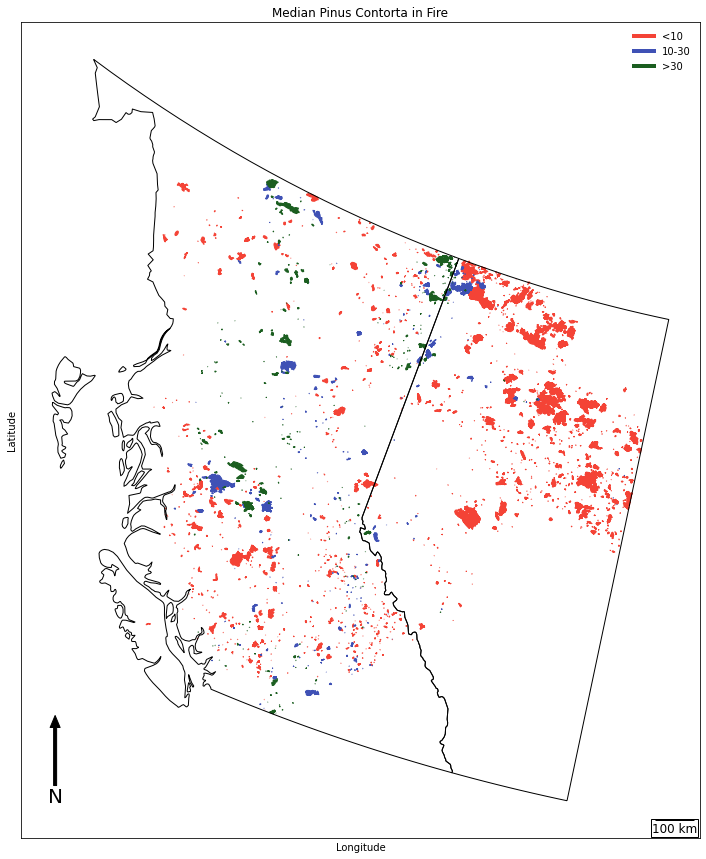

In [9]:
view_information('','pinus_contorta_in_cnfdb_fires.txt')